# Time profiler for Haar class

In [1]:
from slope import Haar, load_data

Import data

In [2]:
dust_file = 'Dust records corregidos Completo.xlsx'
id_data, lis, new_length = load_data(dust_file)
id_data

,Name,Data id,Latitud,Longitud,Age units,Data units,Data length
0,Vostok,1,-78.464167,106.865833,ka,(ug/m2/a),507
1,EPICA Dome C,2,-75.100000,123.350000,ka,(mg/m**2/a),298205
2,EPICA EDML,3,-75.002500,0.068400,ka,(ug/m**2/a),2303
3,Talos Dome,4,-72.817000,159.183000,ka BP,(µg/kg),64998
4,PS75/59-2,5,-54.215000,-125.425500,(kyr),(wt-%),2384
5,ML1208-17PC,6,0.480000,-156.450000,ka,(g/m2/yr),192
6,ML1208-31BB,7,4.680000,-160.050000,ka,(g/m2/yr),254
7,ML1208-37BB,8,7.040000,-161.630000,ka,(g/m2/yr),105
8,Xifeng,9,35.700000,107.600000,ka,(g/m^2/ka),722
9,Chinese Loess Plateau,10,35.760000,107.817333,ka,(g/cm3/ka),1801


In [3]:
ix = 9
t = lis[ix][lis[ix].columns[0]]
T = lis[ix][lis[ix].columns[1]]

In [4]:
haar_obj = Haar(t,T,smooth=True,bins=20)

Steps

In [5]:
%%time
haar_obj.compute_deltas()

CPU times: user 5.84 ms, sys: 23 µs, total: 5.86 ms
Wall time: 4.33 ms


In [6]:
%%time
haar_obj.compute_epsilons()

CPU times: user 9.15 ms, sys: 10 µs, total: 9.16 ms
Wall time: 7.88 ms


In [7]:
print('t samples:',len(haar_obj.t))
print('deltas_t steps: from 1 to',len(haar_obj.deltas_t))
print('epsilons steps:',len(haar_obj.epsilons))

t samples: 1801
deltas_t steps: from 1 to 900
epsilons steps: 900


More steps

In [8]:
%%time
haar_obj.fluctuations()

Progress: 27.793%, time elapsed 0m 8s
Progress: 55.586%, time elapsed 0m 13s
Progress: 83.380%, time elapsed 0m 17s
Finished computations in 0m 17s
0 fluctuaciones eliminadas (0.000%)
CPU times: user 17.6 s, sys: 40 ms, total: 17.6 s
Wall time: 17.6 s


In [9]:
%%time
haar_obj.algo()

CPU times: user 1.94 s, sys: 16.1 ms, total: 1.96 s
Wall time: 1.95 s


In [10]:
%%time
haar_obj.do_smoothing()

CPU times: user 5.39 ms, sys: 5 µs, total: 5.39 ms
Wall time: 3.33 ms


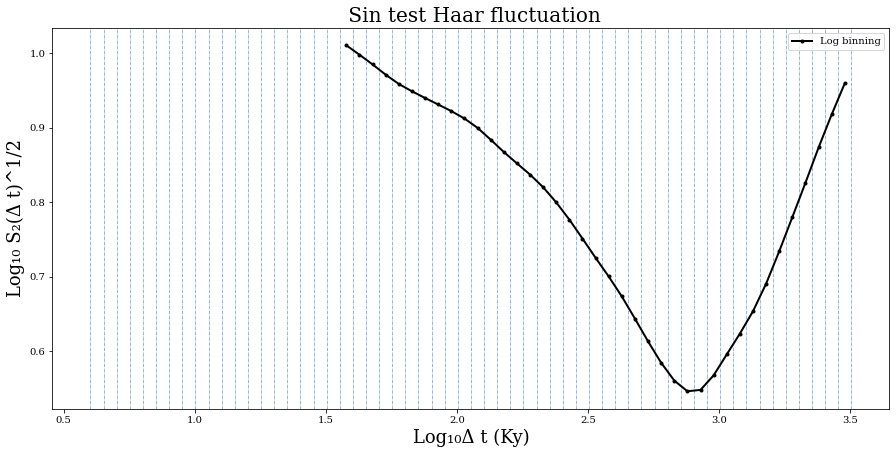

In [11]:
haar_obj.plot()

In [ ]:
delta_t = haar_obj.delta_t_values
hs = haar_obj.Hs_values
time_haar = haar_obj.time
amp = haar_obj.smooth_val
app = haar_obj.upper
low = haar_obj.lower

In [ ]:
import cProfile

Otras cosas

In [ ]:
from scipy.stats import linregress
from scipy.signal import savgol_filter